# RFM用户价值模型-聚类法

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step1：问题分析

|  RFM   | 含义  | 描述 |
|  :----:  | :----:  |  :----  |
| R（Recency）  | 最近一次消费时间 | 用户最近一次消费距离现在的时间 |
| F（Frequency） | 消费频率 | 用户在统计周期内购买商品的次数 |
| M（Monetary）| 消费金额 | 用户在统计周期内消费的总金额 |

## Step2：获取数据

In [2]:
filename = 'data/Online Retail Clean.xlsx'
sales_success = pd.read_excel(filename, sheet_name='Online Retail Clean')

In [3]:
sales_success.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceTime      datetime64[ns]
UnitPrice               float64
CustomerID                int64
Country                  object
UnitPrice_RMB           float64
SumPrice                float64
dtype: object

In [4]:
# Date存放InvoiceTime中的日期部分
sales_success['Date'] = pd.to_datetime(sales_success['InvoiceTime'].dt.date)
sales_success.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceTime      datetime64[ns]
UnitPrice               float64
CustomerID                int64
Country                  object
UnitPrice_RMB           float64
SumPrice                float64
Date             datetime64[ns]
dtype: object

## Step5：RFM建模

In [5]:
sales_customer = sales_success[sales_success.CustomerID != 0].copy()
sales_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Date
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,22.3890,134.3340,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,29.7642,178.5852,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,24.1450,193.1600,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,29.7642,178.5852,2010-12-01
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,29.7642,178.5852,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,7.4630,89.5560,2011-12-09
524874,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,18.4380,110.6280,2011-12-09
524875,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,36.4370,145.7480,2011-12-09
524876,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,36.4370,145.7480,2011-12-09


### RFM值计算

#### 按照客户进行分组聚合

+ 因为要计算订单次数，需要两次Groupby

In [6]:
customer_grouped = sales_customer.groupby(['CustomerID', 'InvoiceNo'], as_index=False).agg({
    'SumPrice':np.sum,
    'Date':np.max
})
customer_grouped

,CustomerID,InvoiceNo,SumPrice,Date
0,12346,541431,677672.0080,2011-01-18
1,12347,537626,6249.5162,2010-12-07
2,12347,542237,4173.9242,2011-01-26
3,12347,549222,5586.2750,2011-04-07
4,12347,556201,3358.5256,2011-06-09
...,...,...,...,...
18527,18283,579673,1934.3218,2011-11-30
18528,18283,580872,1826.2400,2011-12-06
18529,18287,554065,6719.1584,2011-05-22
18530,18287,570715,8791.5896,2011-10-12


In [7]:
customer_grouped = customer_grouped.groupby('CustomerID').agg({
    'SumPrice':np.sum,
    'Date':np.max,
    'InvoiceNo':np.size
})
customer_grouped

,SumPrice,Date,InvoiceNo
CustomerID,,,
12346,677672.0080,2011-01-18,1
12347,37841.8000,2011-12-07,7
12348,15779.7672,2011-09-25,4
12349,15431.2890,2011-11-21,1
12350,2936.0320,2011-02-02,1
...,...,...,...
18280,1585.6680,2011-03-07,1
18281,709.5996,2011-06-12,1
18282,1563.2790,2011-12-02,2


In [8]:
# 用来存放每个客户的RFM值
rfm = pd.DataFrame()

#### R值

R（Recency）：最近一次消费时间，用户最近一次消费距离现在的时间。

In [9]:
now = pd.to_datetime('2011-12-10')
rfm['R'] = (now - customer_grouped['Date']).dt.days

In [10]:
rfm.head()

,R
CustomerID,
12346,326
12347,3
12348,76
12349,19
12350,311


#### F值

F（Frequency）：消费频率，用户在统计周期内购买商品的次数。

In [11]:
rfm['F'] = customer_grouped['InvoiceNo']
rfm.head()

,R,F
CustomerID,,
12346,326,1
12347,3,7
12348,76,4
12349,19,1
12350,311,1


#### M值

M（Monetary）：消费金额，用户在统计周期内消费的总金额。 

In [12]:
rfm['M'] = customer_grouped['SumPrice']
rfm.head()

,R,F,M
CustomerID,,,
12346,326,1,677672.0080
12347,3,7,37841.8000
12348,76,4,15779.7672
12349,19,1,15431.2890
12350,311,1,2936.0320


### RFM值评分（打分RFM模型-得分规则取决于业务）

#### 按规则划分

In [13]:
rfm_rule_score = pd.DataFrame()

##### 计算R得分

In [14]:
# 划分规则
r_bins = [0,30,60,90,120,1000000]
r_labels = [5,4,3,2,1]
# 评分
rfm_rule_score['R'] = pd.cut(rfm['R'], bins = r_bins, labels = r_labels, right = False)
rfm_rule_score.head()

,R
CustomerID,
12346,1
12347,5
12348,3
12349,5
12350,1


##### 计算F得分

In [15]:
# 划分规则
f_bins = [1,2,3,4,5,10000]
f_labels = [1,2,3,4,5]
# 评分
rfm_rule_score['F'] = pd.cut(rfm['F'], bins = f_bins, labels = f_labels, right = False)
rfm_rule_score.head()

,R,F
CustomerID,,
12346,1,1
12347,5,5
12348,3,4
12349,5,1
12350,1,1


##### 计算M得分

In [16]:
# 划分规则
m_bins = [0,50,100,150,200,1000000]
m_labels = [1,2,3,4,5]
# 评分
rfm_rule_score['M'] = pd.cut(rfm['M'], bins = m_bins, labels = m_labels)
rfm_rule_score.head()

,R,F,M
CustomerID,,,
12346,1,1,5
12347,5,5,5
12348,3,4,5
12349,5,1,5
12350,1,1,5


##### 修改格式

In [17]:
rfm_rule_score.dtypes

R    category
F    category
M    category
dtype: object

In [18]:
# 修改格式
rfm_rule_score['R'] = rfm_rule_score['R'].astype(float)
rfm_rule_score['F'] = rfm_rule_score['F'].astype(float)
rfm_rule_score['M'] = rfm_rule_score['M'].astype(float)
rfm_rule_score.head()

,R,F,M
CustomerID,,,
12346,1.0,1.0,5.0
12347,5.0,5.0,5.0
12348,3.0,4.0,5.0
12349,5.0,1.0,5.0
12350,1.0,1.0,5.0


In [19]:
rfm_rule_score.dtypes

R    float64
F    float64
M    float64
dtype: object

##### 计算RFM总得分

In [20]:
rfm_rule_score['Score'] = rfm_rule_score[['R', 'F', 'M']].apply(lambda x: x.sum(), axis=1)
rfm_rule_score.sort_values(by='Score', ascending=False)

,R,F,M,Score
CustomerID,,,,
14367,5.0,5.0,5.0,15.0
13650,5.0,5.0,5.0,15.0
16814,5.0,5.0,5.0,15.0
13590,5.0,5.0,5.0,15.0
15426,5.0,5.0,5.0,15.0
...,...,...,...,...
17956,1.0,1.0,3.0,5.0
15823,1.0,1.0,3.0,5.0
13307,1.0,1.0,3.0,5.0


#### 按层次划分

+ 1、当R/F/M得分>R/F/M平均值时，赋值为“1”，反之则赋值为“0”
+ 2、根据得分，添加用户分层类型标签

|  RFM   | R  | F | M |
|  :----:  | :----:  |  :----:  |  :----:  |
| 重点价值客户  | 1 | 1 | 1 |
| 重点发展客户 | 1 | 0 | 1 |
| 重点保持客户 | 0 | 1 | 1 |
| 重点挽留客户  | 0 | 0 | 1 |
| 一般价值客户 | 1 | 1 | 0 |
| 一般发展客户 | 1 | 0 | 0 |
| 一般保持客户  | 0 | 1 | 0 |
| 一般挽留客户 | 0 | 0 | 0 |

##### 计算均值

In [21]:
# 也可以这样
r_mean = rfm['R'].mean()
f_mean = rfm['F'].mean()
m_mean = rfm['M'].mean()

In [22]:
r_mean

93.05947441217151

In [23]:
f_mean

4.272014753342554

In [24]:
m_mean

17987.481348391004

##### 用map函数进行转换

In [25]:
rfm_mean_score = pd.DataFrame()

In [26]:
rfm_mean_score['R'] = rfm['R'].map(lambda x: 1 if x < r_mean else 0)
rfm_mean_score['F'] = rfm['F'].map(lambda x: 1 if x > f_mean else 0)
rfm_mean_score['M'] = rfm['M'].map(lambda x: 1 if x > m_mean else 0)
rfm_mean_score.head()

,R,F,M
CustomerID,,,
12346,0,0,1
12347,1,1,1
12348,1,0,0
12349,1,0,0
12350,0,0,0


### 基于指标给客户打标签（均值RFM模型）

|  RFM   | R  | F | M |
|  :----:  | :----:  |  :----:  |  :----:  |
| 重点价值客户  | 1 | 1 | 1 |
| 重点发展客户 | 1 | 0 | 1 |
| 重点保持客户 | 0 | 1 | 1 |
| 重点挽留客户  | 0 | 0 | 1 |
| 一般价值客户 | 1 | 1 | 0 |
| 一般发展客户 | 1 | 0 | 0 |
| 一般保持客户  | 0 | 1 | 0 |
| 一般挽留客户 | 0 | 0 | 0 |

In [27]:
rfm_mean_score['Label'] = (rfm_mean_score['R'] * 100) + (rfm_mean_score['F'] * 10) + (rfm_mean_score['M'] * 1)
rfm_mean_score.head()

,R,F,M,Label
CustomerID,,,,
12346,0,0,1,1
12347,1,1,1,111
12348,1,0,0,100
12349,1,0,0,100
12350,0,0,0,0


In [28]:
#判断R/F/M是否大于均值
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

In [29]:
rfm_mean_score['pattern'] = rfm_mean_score['Label'].apply(transform_label)
rfm_mean_score

,R,F,M,Label,pattern
CustomerID,,,,,
12346,0,0,1,1,重要挽留客户
12347,1,1,1,111,重要价值客户
12348,1,0,0,100,一般发展客户
12349,1,0,0,100,一般发展客户
12350,0,0,0,0,一般挽留客户
...,...,...,...,...,...
18280,0,0,0,0,一般挽留客户
18281,0,0,0,0,一般挽留客户
18282,1,0,0,100,一般发展客户


#### RFM分层统计

+ 把标签拼接到RFM原始数据中

In [30]:
rfm = rfm.merge(rfm_mean_score['pattern'], on='CustomerID')

In [31]:
rfm

,R,F,M,pattern
CustomerID,,,,
12346,326,1,677672.0080,重要挽留客户
12347,3,7,37841.8000,重要价值客户
12348,76,4,15779.7672,一般发展客户
12349,19,1,15431.2890,一般发展客户
12350,311,1,2936.0320,一般挽留客户
...,...,...,...,...
18280,278,1,1585.6680,一般挽留客户
18281,181,1,709.5996,一般挽留客户
18282,8,2,1563.2790,一般发展客户


##### 查看每类的分布情况

In [32]:
rfm.pattern.value_counts()

一般发展客户    1750
一般挽留客户    1319
重要价值客户     689
一般价值客户     358
重要发展客户     117
一般保持客户      40
重要挽留客户      38
重要保持客户      27
Name: pattern, dtype: int64

In [33]:
rfm.reset_index().groupby('pattern').agg({
    'R':'mean',
    'F':'mean',
    'M':'mean',
    'CustomerID':'count'
})

,R,F,M,CustomerID
pattern,,,,
一般价值客户,25.184358,6.522346,12107.768868,358
一般保持客户,160.875000,5.700000,9983.064135,40
一般发展客户,39.317714,2.121143,5589.006247,1750
一般挽留客户,220.306293,1.552691,3931.361357,1319
重要价值客户,19.518142,13.776488,72465.669725,689
重要保持客户,153.000000,8.814815,34678.899304,27
重要发展客户,38.213675,3.205128,43326.617222,117
重要挽留客户,178.973684,2.736842,63030.862378,38


##### 查看具体类型的用户

In [34]:
rfm[rfm.pattern == '重要价值客户']

,R,F,M,pattern
CustomerID,,,,
12347,3,7,37841.8000,重要价值客户
12352,37,8,22003.0312,重要价值客户
12362,4,10,45886.2994,重要价值客户
12388,16,6,24414.1948,重要价值客户
12395,20,12,26503.5714,重要价值客户
...,...,...,...,...
18230,10,7,24673.5560,重要价值客户
18241,10,17,18201.7302,重要价值客户
18245,8,7,22538.7868,重要价值客户


### 基于聚类方法的划分（聚类RFM模型-结合机器学习）

+ 相关系数矩阵：聚类算法要求数据相关性不太高

In [35]:
rfm[['R', 'F', 'M']].corr()

,R,F,M
R,1.000000,-0.260783,-0.121975
F,-0.260783,1.000000,0.552780
M,-0.121975,0.552780,1.000000


+ 散点图矩阵

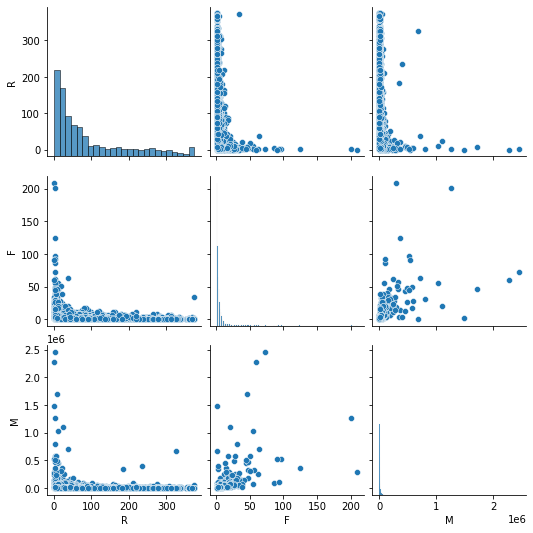

In [36]:
import seaborn as sns
sns.pairplot(rfm[['R', 'F', 'M']])

#### 数据预处理

+ 基于距离的聚类算法需要对数据进行标准化

In [37]:
from sklearn import preprocessing

##### 归一化

+ 最大最小归一化: ${x}_{normalization}=\frac{x-Min}{Max-Min}$

In [38]:
def MaxMinNormalization(x):
    Min = np.min(x)
    Max = np.max(x)
    x = (x - Min) / (Max - Min);
    return x

rfm_norm = rfm[['R', 'F', 'M']].apply(MaxMinNormalization)
rfm_norm.head()

,R,F,M
CustomerID,,,
12346,0.871314,0.000000,0.275443
12347,0.005362,0.028846,0.015368
12348,0.201072,0.014423,0.006401
12349,0.048257,0.000000,0.006259
12350,0.831099,0.000000,0.001180


C:\Users\victo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'M'}>, <AxesSubplot:>]], dtype=object)

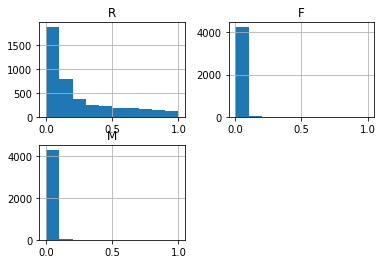

In [39]:
rfm_norm.hist()

In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
minmax = min_max_scaler.fit_transform(rfm[['R', 'F', 'M']])
rfm_norm = pd.DataFrame(minmax, index=rfm.index, columns=['R', 'F', 'M'])
rfm_norm.head()

,R,F,M
CustomerID,,,
12346,0.871314,0.000000,0.275443
12347,0.005362,0.028846,0.015368
12348,0.201072,0.014423,0.006401
12349,0.048257,0.000000,0.006259
12350,0.831099,0.000000,0.001180


##### 标准化

+ Z-score标准化: ${x}_{standardization}=\frac{x-\mu }{\sigma}$

In [41]:
def Z_ScoreNormalization(x):
    mu = np.mean(x)
    sigma = np.std(x)
    x = (x - mu) / sigma;
    return x

rfm_norm = rfm[['R', 'F', 'M']].apply(Z_ScoreNormalization)
rfm_norm.head()

,R,F,M
CustomerID,,,
12346,2.329388,-0.425097,8.363010
12347,-0.900588,0.354417,0.251699
12348,-0.170593,-0.035340,-0.027988
12349,-0.740589,-0.425097,-0.032406
12350,2.179389,-0.425097,-0.190812


C:\Users\victo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'M'}>, <AxesSubplot:>]], dtype=object)

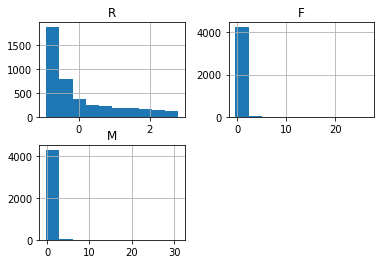

In [42]:
rfm_norm.hist()

In [43]:
zscore_scaler = preprocessing.StandardScaler()
zscore = zscore_scaler.fit_transform(rfm[['R', 'F', 'M']])
rfm_norm = pd.DataFrame(zscore, index=rfm.index, columns=['R', 'F', 'M'])
rfm_norm.head()

,R,F,M
CustomerID,,,
12346,2.329388,-0.425097,8.363010
12347,-0.900588,0.354417,0.251699
12348,-0.170593,-0.035340,-0.027988
12349,-0.740589,-0.425097,-0.032406
12350,2.179389,-0.425097,-0.190812


#### 数据建模

In [44]:
# Step2：选择聚类模型
from sklearn.cluster import KMeans 
# Step3：实例化模型
kmodel = KMeans(n_clusters=3)
# Step4：训练模型
kmodel.fit(rfm_norm[['R', 'F', 'M']])
# Step4/5：训练并预测模型
# kmodel.fit_predict(rfm_norm[['R', 'F', 'M']])

KMeans(n_clusters=3)

In [45]:
# 得到聚类标签
cluster_labels = kmodel.labels_
cluster_labels
# 注意：标签是numpy的ndarray数组类型

array([0, 2, 2, ..., 2, 2, 2])

#### 模型评估

In [46]:
# 惯性值
kmodel.inertia_

5441.678635303333

**讨论**
+ inertia惯性值越小越好

In [47]:
# 轮廓分析
from sklearn.metrics import silhouette_score
silhouette_score(rfm_norm[['R', 'F', 'M']], labels= cluster_labels)

0.5937570862143289

**讨论**
+ silhouette_score轮廓分析值越接近1越好

#### 可视化

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


Text(0.5, 0.92, 'Clusters of RFM Model')

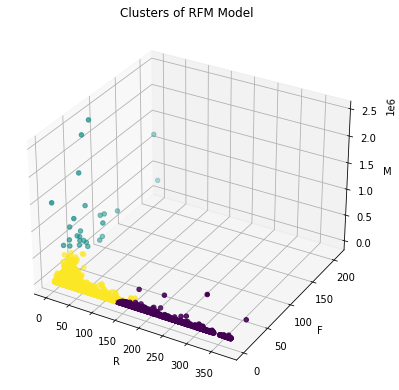

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
# fig.add_axes(ax)
ax.scatter(rfm.R, rfm.F, rfm.M, c=cluster_labels)
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
ax.set_title('Clusters of RFM Model')
# ax.view_init(7, -80)

从三维图中可以看出根据用户在R、F、M三个维度的数值表现奖用户分为了三个群体（通过有颜色不同标识）
+ 第一类（绿色），人群消费金额较高，距离最近购买，人数较少
+ 第二类（黄色），消费金额在中档水平，距离最近购买比较多
+ 第三类（紫色），人群消费金额较低，且距离最近比较远

#### RFM分层统计

|  RFM   | R  | F | M |
|  :----:  | :----:  |  :----:  |  :----:  |
| 重点价值客户  | 1 | 1 | 1 |
| 重点发展客户 | 1 | 0 | 1 |
| 重点保持客户 | 0 | 1 | 1 |
| 重点挽留客户  | 0 | 0 | 1 |
| 一般价值客户 | 1 | 1 | 0 |
| 一般发展客户 | 1 | 0 | 0 |
| 一般保持客户  | 0 | 1 | 0 |
| 一般挽留客户 | 0 | 0 | 0 |

In [49]:
# 添加分类列
rfm_kmeans = rfm.assign(cluster_labels = cluster_labels)
rfm_kmeans.head()

,R,F,M,pattern,cluster_labels
CustomerID,,,,,
12346,326,1,677672.0080,重要挽留客户,0
12347,3,7,37841.8000,重要价值客户,2
12348,76,4,15779.7672,一般发展客户,2
12349,19,1,15431.2890,一般发展客户,2
12350,311,1,2936.0320,一般挽留客户,0


In [50]:
# 对每组进行分组统计
rfm_kmeans.reset_index().groupby('cluster_labels').agg({
    'R':np.mean,
    'F':np.mean,
    'M':np.mean,
    'CustomerID':np.size
})

,R,F,M,CustomerID
cluster_labels,,,,
0,247.122355,1.581417,5530.797686,1087
1,6.461538,66.423077,753552.965515,26
2,41.830078,4.677829,16255.919349,3225


+ 第一类人群（cluster_labels=1）：消费时间间隔较短，消费次数较多，同时消费金额最大，属于高价值用户群体，应做重点维护
+ 第二类人群（cluster_labels=2）：所占人数最多，消费时间间隔中等，消费频率中等，处于中等水平，是重点运营的用户群
+ 第三类人群（cluster_labels=0）：消费时间间隔较长，消费次数较少，且消费金额低，是价值较低的用户群体，做次要运营

**讨论**
+ 1、比较和人工标签的差异
+ 2、不同的标准化方法得出结果是否不同？

#### 优化聚类数量

**第一种方法：根据惯性值来查看**

Text(0, 0.5, 'SSE')

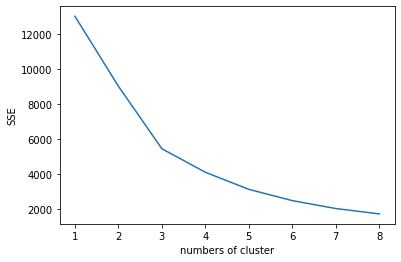

In [51]:
# 查看聚类数量
from sklearn.metrics import silhouette_score
em = []
ks = range(1, 9)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm_norm[['R', 'F', 'M']])
    score = kmeans.inertia_ # 惯性指数
    em.append(score)
plt.plot(ks, em)
plt.xlabel("numbers of cluster")
plt.ylabel("SSE")

**讨论**
+ 通常可以找拐点，即趋势变舒缓的点作为参考聚类数
+ 本例中，3类是可以接受的值

**第二种方法：根据轮廓分析指数**

Text(0, 0.5, 'silhouette score')

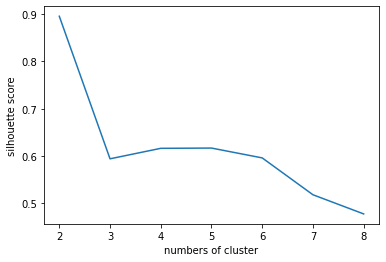

In [52]:
# 查看聚类数量
from sklearn.metrics import silhouette_score
em = []
ks = range(2, 9)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm_norm[['R', 'F', 'M']])
    score = silhouette_score(rfm_norm[['R', 'F', 'M']], labels = kmeans.labels_) # 轮廓分析指数
    em.append(score)
plt.plot(ks, em)
plt.xlabel("numbers of cluster")
plt.ylabel("silhouette score")

**讨论**
+ 通常可以找最高点，即峰值的点作为参考聚类数
+ 本例中，3-6类也是较好的值